# **Hearthstone Data Exploration**

This project explores and analyzes Hearthstone card data from the *Wild* format, where players can use cards from any set without restrictions. 

The dataset, fetched via the Blizzard API, contains a rich variety of attributes that describe each card. These include:

- **General Properties**: Mana cost, rarity, class affiliation.
- **Card Types**: Minions, spells, weapons, and more.
- **Subtype Information**: Minion tribes (e.g., Dragon, Mech) and spell schools (e.g., Fire, Shadow).
- **Combat Stats**: Attack and health for applicable cards.
- **Card Sets**: Information about the expansion or set a card belongs to.
- **Artwork**: Details about the artists responsible for the card illustrations.

In this notebook, we’ll systematically explore these properties and investigate patterns, such as:
1. The distribution of **card types**, **subtypes**, and **rarities**.
2. Insights into class-specific cards and **multiclass cards**.
3. Relationships between **mana costs**, **attack**, and **health**.
4. Additional curiosities, such as identifying the most prolific card artist.

## **Introduction**

The project begins by fetching Hearthstone card data using Blizzard's official API. After acquiring the dataset, we'll process and analyze it to explore:

The distribution of card properties (e.g., mana cost, rarity).
Class-specific trends or patterns.
Any interesting insights about the diversity of cards in the Wild format.

### **Setup and Initial Exploration**
Before diving into analysis, we need to import necessary libraries and fetch the data

In [190]:
import pandas as pd 
from api_fetch import fetch_hearthstone_data
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Acquisition**
We fetch the data using the fetch_hearthstone_data() function from the `api_fetch` module. The data is also saved locally as `hearthstone_all_cards.json`.

In [191]:
fetched_cards = await fetch_hearthstone_data()

df = pd.read_json('hearthstone_all_cards.json')

Fetched 5805 cards in total from the API.


#### **Verify Data Fetching**
To ensure the data was loaded successfully, let's check its shape (i.e., the number of rows and columns):

In [192]:
print(df.shape)

(5805, 33)


#### **Inspect Column Names**
Understanding the structure of the dataset is crucial. Let's list all column names:

In [193]:
print(df.columns)

Index(['id', 'collectible', 'slug', 'classId', 'multiClassIds',
       'spellSchoolId', 'cardTypeId', 'cardSetId', 'rarityId', 'artistName',
       'manaCost', 'name', 'text', 'image', 'imageGold', 'flavorText',
       'cropImage', 'childIds', 'keywordIds', 'isZilliaxFunctionalModule',
       'isZilliaxCosmeticModule', 'health', 'attack', 'minionTypeId',
       'multiTypeIds', 'runeCost', 'armor', 'durability', 'parentId',
       'bannedFromSideboard', 'touristClassId', 'copyOfCardId',
       'maxSideboardCards'],
      dtype='object')


## **1. Main Card Types in Hearthstone**

Hearthstone cards can be broadly categorized into the following main types:
- **Minions**: Cards that are summoned onto the battlefield to attack or defend.
- **Spells**: Cards that have one-time effects, such as dealing damage, healing, or modifying the game state.
- **Weapons**: Cards that are equipped to the hero and allow them to attack directly.
- **Hero Cards**: Legendary cards that transform the player's hero and grant new abilities or effects.
- **Locations**: Cards that provide reusable effects over several turns, often requiring an activation cost.

These card types can be identified in the extracted JSON file via the `cardTypeId` field. To better understand the mapping, let's first look at the distribution of `cardTypeId` values in the dataset:

In [194]:
type_counts_unmapped = df['cardTypeId'].value_counts()

for types_unmapped, count_types_unmapped in type_counts_unmapped.items():
    print(f"Card with '{types_unmapped}' Type: {count_types_unmapped}")

Card with '4' Type: 3734
Card with '5' Type: 1797
Card with '7' Type: 193
Card with '3' Type: 49
Card with '39' Type: 32


### **Mapping and Counting Card Types**

These categories can of course be identified in the extracted JSON file via the `cardTypeId` field. By manually checking based on information from [Hearthstone's official card database](https://hearthstone.blizzard.com/en-us/cards), we find:

- **Minion**: 4
- **Spell**: 5
- **Weapon**: 7
- **Hero Card**: 3
- **Location**: 39

Using this mapping, we can relabel the `cardTypeId` field in the dataset to make it more interpretable.

In [195]:
type_mapping = {
    3: "Hero Card",
    4: "Minion",
    5: "Spell",
    7: "Weapon",
    39: "Location"
}

df['cardTypeId'] = df['cardTypeId'].map(type_mapping)

type_counts = df['cardTypeId'].value_counts()


print("Card Type Distribution:")
for types, count_types in type_counts.items():
    print(f"Cards with '{types}' Type: {count_types}")

Card Type Distribution:
Cards with 'Minion' Type: 3734
Cards with 'Spell' Type: 1797
Cards with 'Weapon' Type: 193
Cards with 'Hero Card' Type: 49
Cards with 'Location' Type: 32


### **Visualizing Main Card Types**

To better understand the distribution of Hearthstone card types, we will visualize the data in two ways:
1. A **bar chart** to compare the absolute counts of each card type.
2. A **pie chart** to show the proportions of each type as percentages.

These visualizations can help identify which types dominate the dataset, providing insights into the design balance of the game.

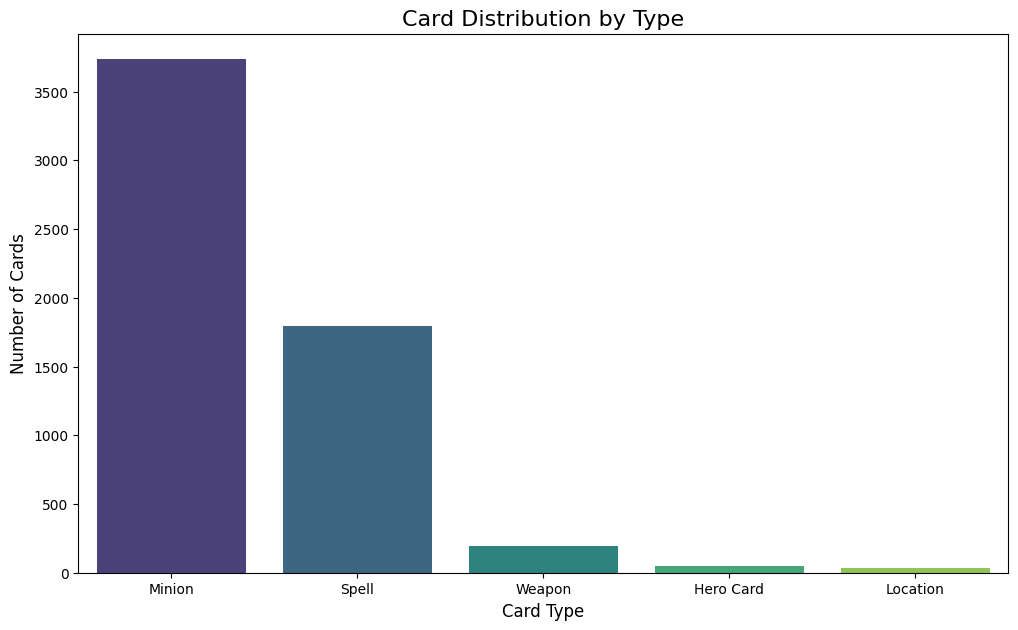

In [196]:
plt.figure(figsize=(12, 7))
sns.barplot(x=type_counts.index, y=type_counts.values, hue=type_counts.index, palette='viridis', legend=False)

plt.title('Card Distribution by Type', fontsize=16)
plt.xlabel('Card Type', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

plt.show()

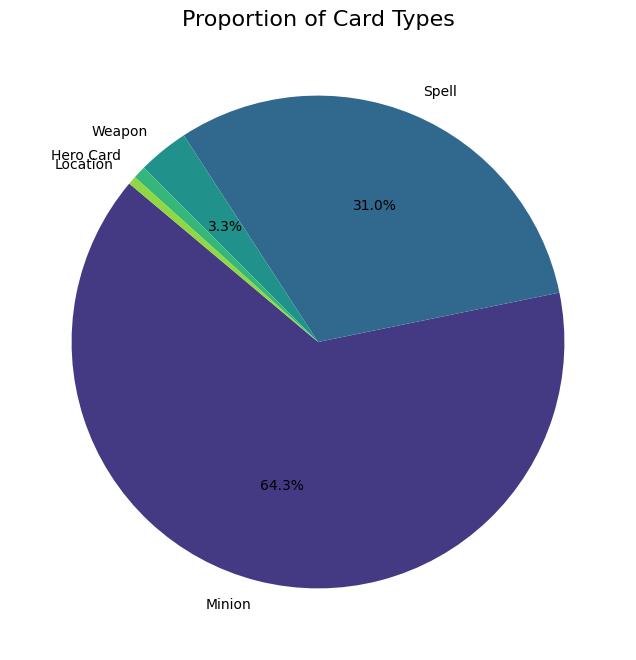

In [197]:
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1 else ''  # Show only for slices >1%

plt.figure(figsize=(10, 8))
plt.pie(
    type_counts.values, 
    labels=type_counts.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=sns.color_palette('viridis', len(type_counts))
)

plt.title('Proportion of Card Types', fontsize=16)
plt.show()

### **Conclusion: Main Card Types in Hearthstone**

The distribution of card types in **Hearthstone** reflects the game's core mechanics and strategies:

- **Minions** make up the largest category, which is expected, as they are the central focus of the game. Players rely heavily on minions for board control and synergy, especially in various deck archetypes.
- **Spells** follow as the second-largest group, serving primarily as support tools to manipulate the game state, deal damage, or provide healing, although they don't persist on the board.
- **Weapons** have a smaller presence, as they are tied to specific hero classes and generally offer a more niche role in deck-building, contributing to hero power-based strategies.
- **Hero Cards** are fewer, aligning with the limited number of heroes in the game. These cards transform the player's hero and provide additional abilities, explaining their relatively low count.
- **Locations** are a newer addition to the game, and their limited number reflects their recent introduction. They offer persistent effects, adding depth to certain strategies.

Overall, the card type distribution aligns with **Hearthstone's gameplay design**, emphasizing minions for core interactions and supporting spells, weapons, and special hero mechanics for more specific, strategic purposes.

## **2. Minion Subtypes**

Minion subtypes in Hearthstone define the different tribes or families to which minion cards belong. These subtypes, such as **Beast**, **Dragon**, or **Demon**, often interact with certain cards or mechanics, providing synergies and strategies for deck building. Cards without a minion subtype (`minionTypeId`) are excluded from this analysis.

To fully explore this topic, we first examine all the minion families (`minionTypeId`) that exist in Hearthstone. After extracting the raw counts, we map these IDs to their corresponding subtypes using information from [Hearthstone's official card database](https://hearthstone.blizzard.com/en-us/cards).

### **Code to Extract Raw Counts**

In [198]:
minion_subtype_counts_unmapped = df['minionTypeId'].value_counts()

for minion_subtypes_unmapped, minion_count_subtypes_unmapped in minion_subtype_counts_unmapped.items():
    print(f"Card with '{minion_subtypes_unmapped}' Type: {minion_count_subtypes_unmapped}")

Card with '20.0' Type: 370
Card with '11.0' Type: 348
Card with '18.0' Type: 228
Card with '17.0' Type: 212
Card with '15.0' Type: 174
Card with '24.0' Type: 155
Card with '23.0' Type: 110
Card with '14.0' Type: 94
Card with '2.0' Type: 92
Card with '92.0' Type: 66
Card with '21.0' Type: 22
Card with '43.0' Type: 19
Card with '26.0' Type: 8


### **Mapped Minion Subtypes**

Now, similar to the **Card Types** analysis, we manually checked the minion subtype IDs. Based on our findings, the following mappings apply:

- **2**: Draenei  
- **11**: Undead  
- **14**: Murloc  
- **15**: Demon  
- **17**: Mech  
- **18**: Elemental  
- **20**: Beast  
- **21**: Totem  
- **23**: Pirate  
- **24**: Dragon  
- **26**: All  
- **43**: Quillboar  
- **92**: Naga  

**Minion cards without a type (`minionTypeId`) are excluded from this analysis, as they do not belong to any family.**

### **Code to Map and Analyze Minion Subtypes**

In [199]:
minion_subtype_mapping = {
    2: "Draenei",
    11: "Undead",
    14: "Murloc",
    15: "Demon",
    17: "Mech",
    18: "Elemental",
    20: "Beast",
    21: "Totem",
    23: "Pirate",
    24: "Dragon",
    26: "All",
    43: "Quillboar",
    92: "Naga"
}

df['minionTypeId'] = df['minionTypeId'].map(minion_subtype_mapping)

minion_subtype_counts = df['minionTypeId'].value_counts()

print("Minion Subtype Distribution:")
for subtype, count in minion_subtype_counts.items():
    print(f"Cards with '{subtype}' Subtype: {count}")

Minion Subtype Distribution:
Cards with 'Beast' Subtype: 370
Cards with 'Undead' Subtype: 348
Cards with 'Elemental' Subtype: 228
Cards with 'Mech' Subtype: 212
Cards with 'Demon' Subtype: 174
Cards with 'Dragon' Subtype: 155
Cards with 'Pirate' Subtype: 110
Cards with 'Murloc' Subtype: 94
Cards with 'Draenei' Subtype: 92
Cards with 'Naga' Subtype: 66
Cards with 'Totem' Subtype: 22
Cards with 'Quillboar' Subtype: 19
Cards with 'All' Subtype: 8


### **Visualising Minion Subtypes**

The following visualizations illustrate the distribution and proportions of minion subtypes in Hearthstone:

- **Bar Chart**: Displays the number of cards associated with each minion subtype. This helps visualize the relative popularity and frequency of each subtype.
- **Pie Chart**: Shows the proportions of each minion subtype in relation to the others, allowing for an easier comparison of their sizes in the overall dataset.

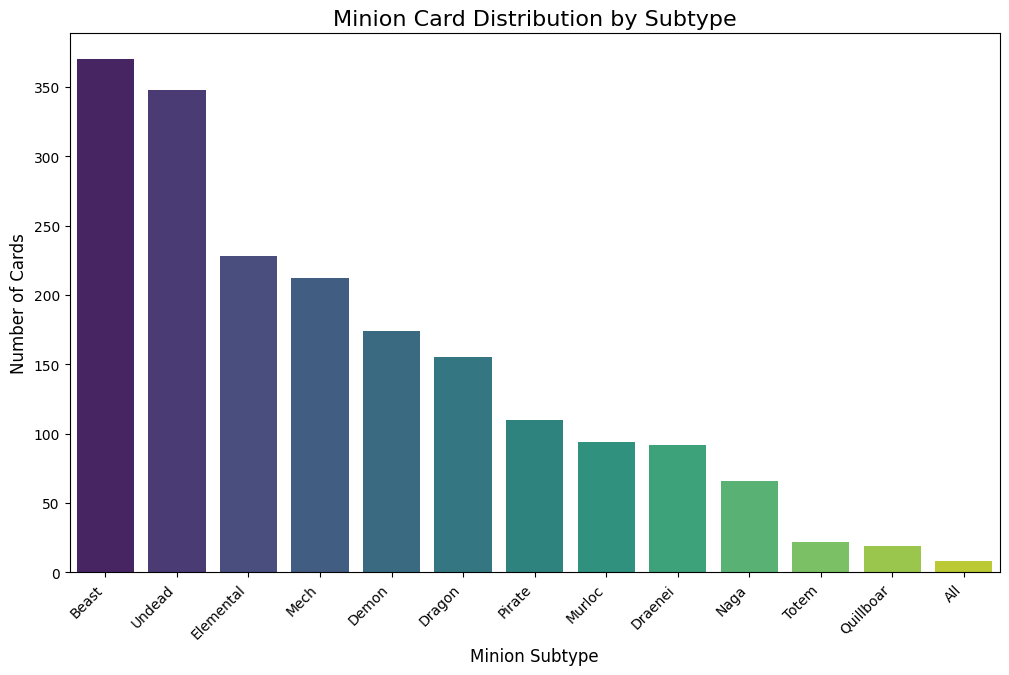

In [200]:
# Bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x=minion_subtype_counts.index, 
    y=minion_subtype_counts.values, 
    palette='viridis',
    hue=minion_subtype_counts.index
)
plt.title('Minion Card Distribution by Subtype', fontsize=16)
plt.xlabel('Minion Subtype', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

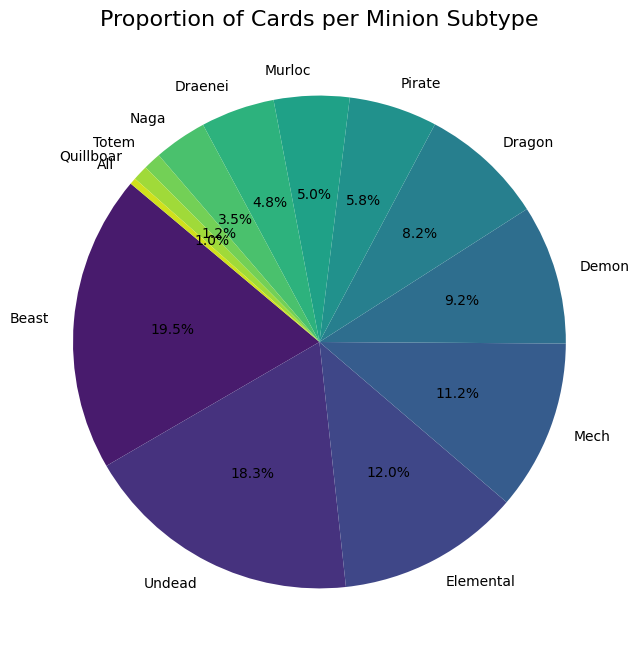

In [201]:
def autopct_format(pct):
    return f'{pct:.1f}%' if pct > 1 else ''  # Show only for slices >1%

plt.figure(figsize=(10, 8))
plt.pie(
    minion_subtype_counts, 
    labels=minion_subtype_counts.index, 
    autopct=autopct_format, 
    startangle=140, 
    colors=sns.color_palette('viridis', len(minion_subtype_counts))
)

plt.title('Proportion of Cards per Minion Subtype', fontsize=16)
plt.show()

### **Conclusion: Minion Subtypes Distribution**

The distribution of **minion subtypes** in Hearthstone reveals a clear connection between card subtypes and the thematic elements introduced in various sets over time. Some subtypes, such as **Beast**, **Undead**, **Elemental**, and **Mech**, have significantly higher card counts, likely because they have been central to many Hearthstone sets, allowing them to be more prevalent in the game.

Key findings include:

- **Beast** is one of the oldest and most consistent subtypes in Hearthstone, appearing frequently across numerous sets, especially in earlier expansions. This is reflected in its high card count (370).
- **Undead**, with 348 cards, also stands out, likely due to the focus on **Undead-themed** sets, such as those centered around the **Scourge** and **Naxxramas**.
- **Mechs** and **Elementals** (212 and 228 cards, respectively) follow a similar trend, both tied to specific expansions with a mechanical or elemental theme, like **GvG (Goblins vs. Gnomes)** and **Un'Goro**.
- **Demon** and **Dragon** subtypes also have a decent number of cards, often featured in set-specific themes like **Demon Hunter** and the **Blackrock Mountain** expansion for Dragons.

On the other hand, the lower count of cards for subtypes such as **Totem** (22) and **Quillboar** (19) can be explained by their more limited scope in the game. **Totems** are exclusive to **Shaman**, and **Quillboars** have not yet seen a significant number of expansions or mechanics built around them, making them less common in the overall card pool. **All** (8 cards), a new concept, includes all other subtypes, thus it is naturally a smaller category.

While the **Minion Subtype Distribution** reflects a mix of thematic elements, it’s also worth noting that some subtypes may have more cards because they’ve been introduced in multiple sets or have received special attention in the design of new cards. To further understand this distribution, it would be insightful to analyze specific sets and their thematic impact on minion subtype prevalence.

In future analysis, we will check the correlation between minion subtypes and the specific expansions in which they appear to confirm our theories above and further understand how certain subtypes become more prominent when specific mechanics or synergies are introduced.

## **3. Mana Costs of Cards**

In Hearthstone, mana is the resource used to play cards. Each turn, players gain one mana crystal, starting from 1 and increasing by 1 each turn, up to a maximum of 10 on turn 10. The mana cost of a card determines how much mana you need to play it.

### **Why Mana Costs Matter**

Mana costs add strategic depth to the game. Low-cost cards (e.g., 1-mana cards) are useful early on, enabling quick plays and early aggression. High-cost cards (e.g., 7 or 8-mana cards) tend to have stronger effects but are typically used later when players have more mana to spend.

### **Maximum Mana Value**

The maximum mana value a player can have is 10 mana crystals on turn 10. Some cards and effects can alter mana usage, providing additional strategic opportunities.

### **Distribution of Mana Costs**

The distribution of mana costs plays a key role in the pacing of the game. Let’s explore the number of cards within each mana cost bracket and those exceeding 10 mana:

In [202]:
for i in range(0,11):
    print("Number of card with the cost of " + str(i) + ": " + str(len(df[df['manaCost']== i])))

print("Number of card with the cost above 10: " + str(len(df[df['manaCost']> 10])))

Number of card with the cost of 0: 102
Number of card with the cost of 1: 770
Number of card with the cost of 2: 1105
Number of card with the cost of 3: 1182
Number of card with the cost of 4: 900
Number of card with the cost of 5: 629
Number of card with the cost of 6: 413
Number of card with the cost of 7: 293
Number of card with the cost of 8: 212
Number of card with the cost of 9: 106
Number of card with the cost of 10: 75
Number of card with the cost above 10: 18


### **Visualizing Mana Costs**

We can visualize the distribution of mana costs to gain insights into how mana is spread across the dataset:

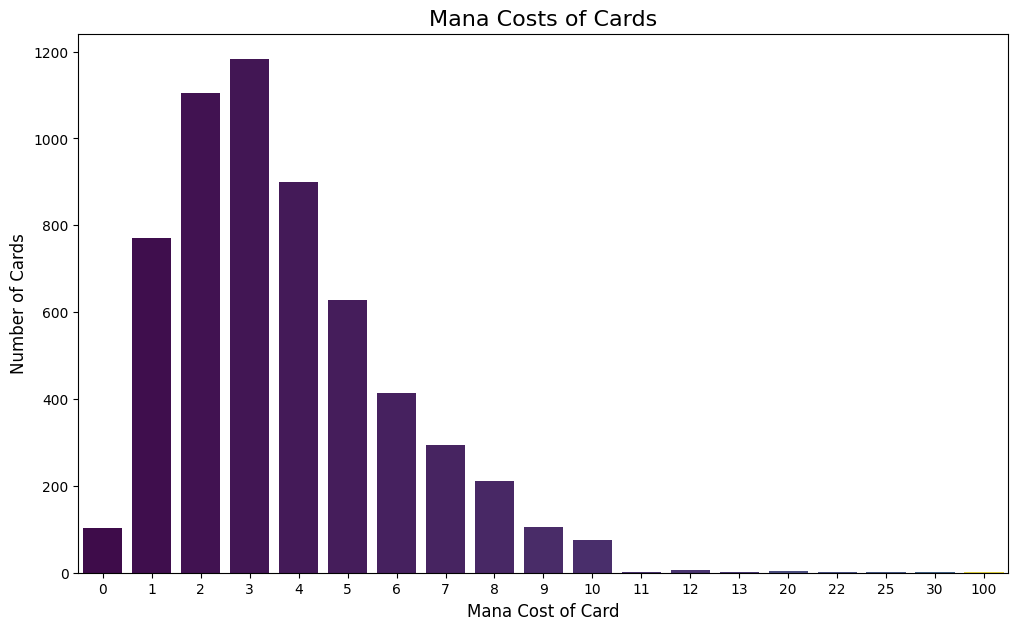

In [203]:
mana_costs = df['manaCost'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=mana_costs.index, y=mana_costs.values, hue=mana_costs.index, palette='viridis', legend=False)

plt.title('Mana Costs of Cards', fontsize=16)
plt.xlabel('Mana Cost of Card', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

plt.show()

### **Conclusion: Mana Costs in Hearthstone Cards**

The distribution of mana costs in **Hearthstone** cards reflects the game's design, balancing **early-game tempo** with **late-game strategy**:

- **Low-cost cards** (0-4 mana) are the most abundant, allowing players to establish early board presence and create synergies.
- **Higher-cost cards** (5-10 mana) are fewer in number, representing more powerful effects that can turn the game in the later stages.

The gradual increase in mana—from 1 to 10 each turn—encourages strategic diversity, ensuring that the game remains dynamic and not repetitive. The system fosters **synergistic combos** and **unexpected outcomes**, allowing for a balance between **quick plays** and **impactful late-game moments**.

Overall, the mana cost distribution maintains the **flow** and **excitement** of the game, offering players both immediate tactical options and long-term strategic planning.

## **4. Distribution of Card Classes**

Hearthstone cards are categorized into different classes based on their design and gameplay mechanics. There are **10 distinct hero classes** in the game, each with unique cards and playstyles, plus **Neutral cards**, which can be used in any deck.

The `classId` column in the dataset represents these classes, and by analyzing its distribution, we can understand how many cards belong to each class and the overall card spread.

### **The Classes and Neutral Cards**

- **Class Cards**: Each hero class (like Druid, Warrior, Mage, etc.) has its own set of cards that synergize with the class's unique abilities. These cards often reflect the class's strengths and strategies. For example:
  - **Druid** cards focus on ramping mana and summoning creatures.
  - **Warrior** cards may focus on armor and weapon-based strategies.

- **Neutral Cards**: Neutral cards, identified by a `classId` of **12**, are not tied to any specific hero class and can be included in any deck. These cards are highly versatile and offer a wide variety of effects, making them essential in many decks.

### **Analyzing the `classId` Distribution**

To analyze the distribution of classes, we first identify the maximum value of `classId` in the dataset. By iterating through this range, we can count how many cards belong to each class. Neutral cards are also included, giving us a complete view of the card distribution.

**By analyzing this data, we gain insights into how different classes are represented in the dataset and which classes dominate or lack representation.**

In [204]:
for classes_unmapped, count_class_unmapped in df['classId'].value_counts().items():
    print(f"Number of Cards with Class '{classes_unmapped}': {count_class_unmapped}")

Number of Cards with Class '12': 1724
Number of Cards with Class '6': 420
Number of Cards with Class '5': 414
Number of Cards with Class '9': 411
Number of Cards with Class '2': 407
Number of Cards with Class '10': 406
Number of Cards with Class '3': 405
Number of Cards with Class '4': 404
Number of Cards with Class '7': 403
Number of Cards with Class '8': 399
Number of Cards with Class '14': 247
Number of Cards with Class '1': 165


### **Analyzing the Class Distribution**

Then, by using [Hearthstone's official card database](https://hearthstone.blizzard.com/en-us/cards), we need to manually check what each `classId` corresponds to. Based on the information gathered, the `classId` values correspond to the following Hearthstone classes:

- **1**: Death Knight
- **2**: Druid
- **3**: Hunter
- **4**: Mage
- **5**: Paladin
- **6**: Priest
- **7**: Rogue
- **8**: Shaman
- **9**: Warlock
- **10**: Warrior
- **12**: Neutral
- **14**: Demon Hunter

This allows us to map each card to its respective class, making the analysis more meaningful.

In [205]:
class_mapping = {
    1: "Death Knight",
    2: "Druid",
    3: "Hunter",
    4: "Mage",
    5: "Paladin",
    6: "Priest",
    7: "Rogue",
    8: "Shaman",
    9: "Warlock",
    10: "Warrior",
    12: "Neutral",
    14: "Demon Hunter"
}

df['className'] = df['classId'].map(class_mapping)

Now that we know each `classId` corresponds to a specific class, we can proceed to check how many cards each class has in the dataset. We can do this by filtering the DataFrame for each `classId` and counting the number of cards associated with each class.

In [206]:
class_counts = df['className'].value_counts()

for classes, count_class in class_counts.items():
    print(f"Number of {classes} Cards: {count_class}")

Number of Neutral Cards: 1724
Number of Priest Cards: 420
Number of Paladin Cards: 414
Number of Warlock Cards: 411
Number of Druid Cards: 407
Number of Warrior Cards: 406
Number of Hunter Cards: 405
Number of Mage Cards: 404
Number of Rogue Cards: 403
Number of Shaman Cards: 399
Number of Demon Hunter Cards: 247
Number of Death Knight Cards: 165


### **Visualizing Class Distribution**

Now, let's visualize the distribution of cards across these classes, both in **absolute counts** and as a **percentage**.

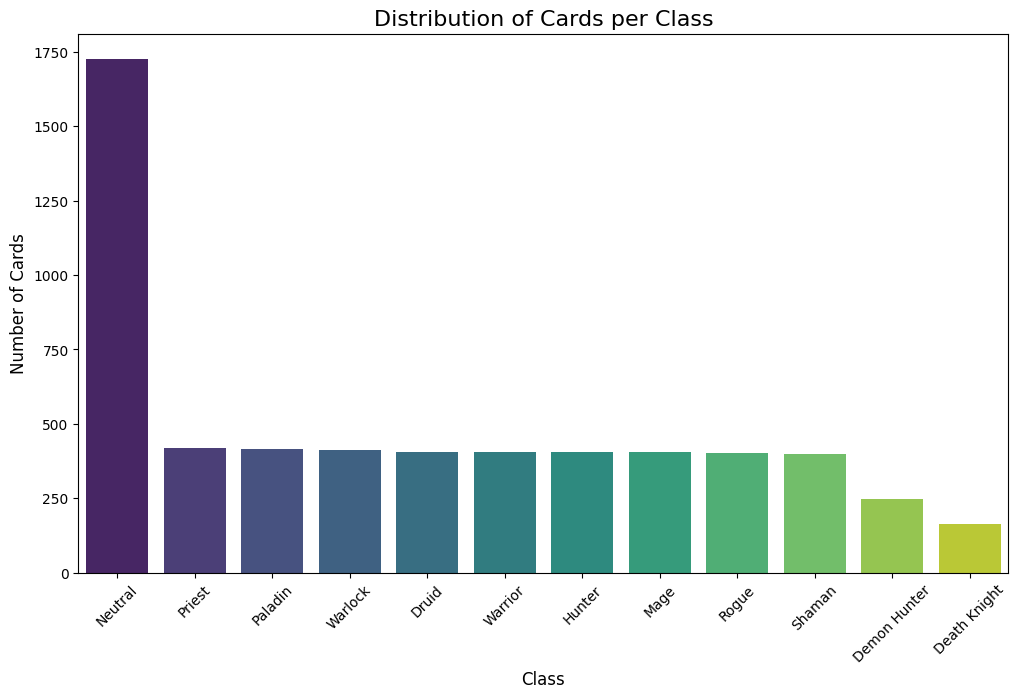

In [207]:
classes = df['className'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=classes.index, y=classes.values, hue=classes.index, palette='viridis', legend=False)

plt.title('Distribution of Cards per Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

plt.xticks(rotation=45)

plt.show()

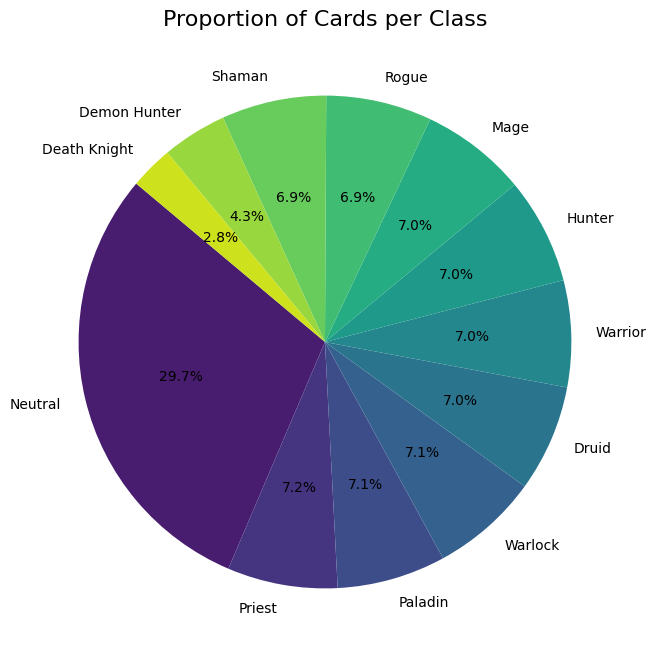

In [208]:
plt.figure(figsize=(10, 8))
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(class_counts)))
plt.title('Proportion of Cards per Class', fontsize=16)
plt.show()

### **Conclusion: Distribution of Class Cards in Hearthstone**


The distribution of class cards in **Hearthstone** reflects a well-balanced design that supports diverse strategies and playstyles. The spread of cards across core classes (Priest, Paladin, Warlock, Druid, Warrior, Hunter, Mage, Rogue, and Shaman) ensures that each class has enough variety to foster unique synergies and approaches.

**Neutral cards**, with their versatility, play a pivotal role in deck-building, offering options for all classes and enhancing the strategic depth of the game. The high number of neutral cards (1724) allows for dynamic deck combinations, providing flexibility across all class types.

The lower card counts for newer classes like **Death Knight** (introduced in 2023) and **Demon Hunter** (introduced in 2020) are expected, as these classes continue to evolve. As future expansions are released, their card pools will likely grow, bringing them closer to the established classes in terms of card variety.

In conclusion, the distribution of class and neutral cards promotes a balanced, diverse, and engaging meta, offering players endless opportunities for experimentation and strategic combinations.

## **5. Multi-Class Cards**

In **Hearthstone**, some cards can be used by multiple classes at once, and this is indicated by the `multiClassIds` field. This field specifies which other classes the card can belong to by listing multiple `classId` values. It allows cards to belong to several classes simultaneously, with each card having a primary `classId` representing its main class.

**In this section, we will analyze how many multi-class cards exist and visualize their distribution across different classes.**

### **Analyzing Multi-Class Cards**

We start by counting the number of multi-class cards using the `multiClassIds` field:

In [209]:
multi_classes = df['multiClassIds'].value_counts()

print(multi_classes)

multiClassIds
[]            5696
[2, 7, 8]        6
[3, 14]          5
[5, 10]          5
[2, 3]           5
[4, 7]           5
[4, 8]           5
[7, 10]          5
[6, 9]           5
[9, 14]          5
[2, 8]           5
[3, 5, 10]       5
[5, 6]           5
[2, 9]           4
[8, 10]          4
[10, 14]         4
[1, 5]           4
[3, 4]           4
[6, 7]           4
[4, 9]           4
[2, 6]           4
[1, 3]           4
[5, 8]           4
[4, 6, 9]        4
[7, 14]          4
Name: count, dtype: int64


Next, we map the `multiClassIds` to their respective class names for easier understanding:

In [210]:
def map_multi_classes(ids):
        return [class_mapping.get(i, f"Unknown ({i})") for i in ids]

# Apply the mapping function to create a new column
df['multiClassNames'] = df['multiClassIds'].apply(map_multi_classes)

multi_classes_names = df['multiClassNames'].value_counts()
print(multi_classes_names)

multiClassNames
[]                            5696
[Druid, Rogue, Shaman]           6
[Hunter, Demon Hunter]           5
[Paladin, Warrior]               5
[Druid, Hunter]                  5
[Mage, Rogue]                    5
[Mage, Shaman]                   5
[Rogue, Warrior]                 5
[Priest, Warlock]                5
[Warlock, Demon Hunter]          5
[Druid, Shaman]                  5
[Hunter, Paladin, Warrior]       5
[Paladin, Priest]                5
[Druid, Warlock]                 4
[Shaman, Warrior]                4
[Warrior, Demon Hunter]          4
[Death Knight, Paladin]          4
[Hunter, Mage]                   4
[Priest, Rogue]                  4
[Mage, Warlock]                  4
[Druid, Priest]                  4
[Death Knight, Hunter]           4
[Paladin, Shaman]                4
[Mage, Priest, Warlock]          4
[Rogue, Demon Hunter]            4
Name: count, dtype: int64


### **Visualizing Multi-Class Card Distribution**

The following visualization illustrates the distribution of multi-class cards across different classes. The bar plot provides an overview of how multi-class cards are spread among various classes, showcasing the number of multi-class cards available for each class in Hearthstone.

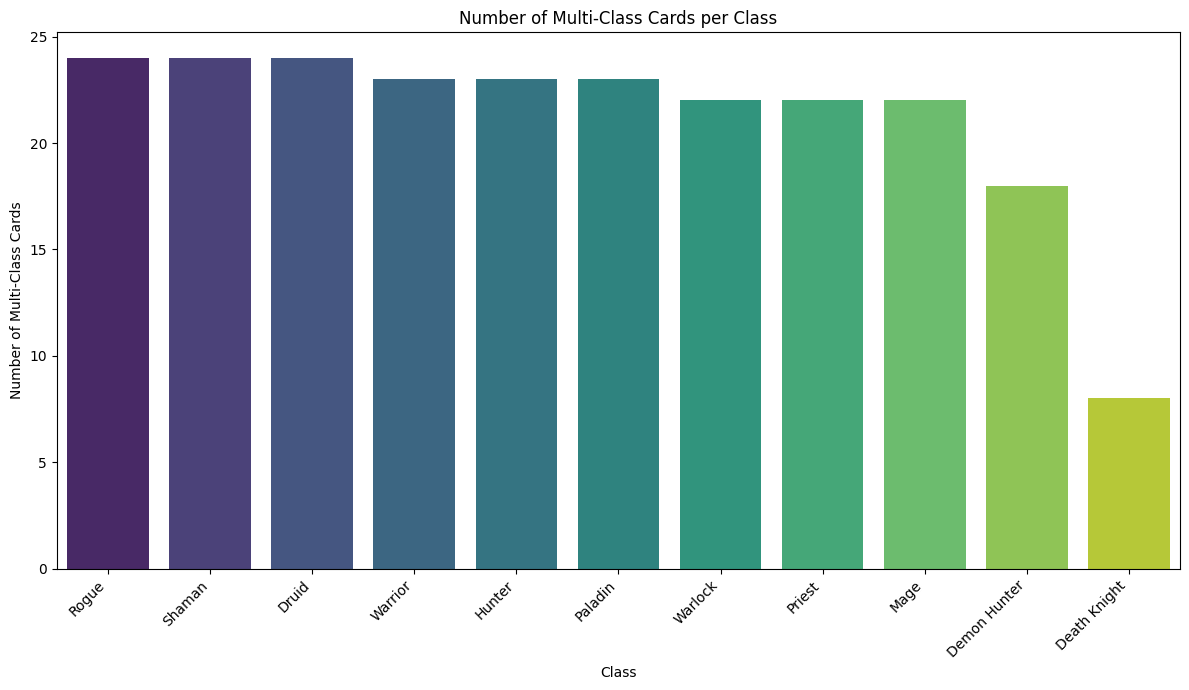

In [211]:
multi_class_count = pd.Series(
    [class_name for sublist in df['multiClassNames'] for class_name in sublist]
).value_counts()

multi_class_count_df = multi_class_count.reset_index()
multi_class_count_df.columns = ['Class', 'Number of Multi-Class Cards']

plt.figure(figsize=(12, 7))

sns.barplot(x='Class', y='Number of Multi-Class Cards', data=multi_class_count_df, hue='Class', palette='viridis')

plt.title('Number of Multi-Class Cards per Class')
plt.xlabel('Class')
plt.ylabel('Number of Multi-Class Cards')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Conclusion: Multi-Class Cards**

The analysis of **multi-class cards** in **Hearthstone** reveals an interesting aspect of deck-building flexibility. Multi-class cards, indicated by the `multiClassIds` field, allow cards to be shared by multiple classes, offering players more strategic options. While these cards are relatively few in number, they play an important role in enhancing synergy across classes without disrupting the core identity of each class.

Key findings include:

- **Limited Number of Multi-Class Cards**: Most multi-class combinations are rare, with 4 to 6 cards per combination. This careful balance ensures that multi-class cards provide diverse strategies without overwhelming the gameplay.
- **Core Classes Dominate**: Multi-class cards primarily feature combinations of the core classes (such as Druid, Mage, and Warrior). This design preserves the distinctiveness of each class while offering opportunities to blend their unique abilities.
- **Integration of Newer Classes**: Multi-class cards are particularly helpful for integrating newer classes like **Demon Hunter** and **Death Knight**, which have fewer cards in their primary class pools. By allowing these classes to borrow synergies from older classes, multi-class cards help ensure their continued viability in the meta.
- **Balanced Distribution**: The even spread of multi-class combinations reflects thoughtful game design, providing strategic options without favoring any specific combination or class, ensuring a balanced and engaging experience for players.

Overall, multi-class cards significantly contribute to **Hearthstone's** depth and strategic variety, enabling players to explore new synergies while maintaining a balanced and dynamic meta.

## **6. Hearthstone Card Rarity Distribution**

Card rarity in Hearthstone is categorized into five distinct levels. Each level has unique visual identifiers and drop rates. We manually mapped the `rarityId` based on information from [Hearthstone's official card database](https://hearthstone.blizzard.com/en-us/cards).

### **Rarity Levels**

1. **Common** (Rarity ID: `1`)
   - **Description**: Common cards are the second-lowest level of rarity, above Free but below Rare, Epic, and Legendary.
   - **Visual Indicators**: 
     - White gem at the bottom-center of the card art.
     - No special glow when opening packs.

2. **Free** (Rarity ID: `2`)
   - **Description**: Free cards represent the lowest rarity level and are primarily obtained after completing the New Player Rank system.
   - **Visual Indicators**:
     - No gem at the bottom-center of the card art.

3. **Rare** (Rarity ID: `3`)
   - **Description**: Rare cards are one level above Common but below Epic and Legendary.
   - **Visual Indicators**: 
     - Blue gem at the bottom-center of the card art.
     - Blue glow when opening packs.

4. **Epic** (Rarity ID: `4`)
   - **Description**: Epic cards are the second-highest level of rarity.
   - **Visual Indicators**: 
     - Purple gem at the bottom-center of the card art.
     - Pink glow when opening packs.

5. **Legendary** (Rarity ID: `5`)
   - **Description**: Legendary cards are the highest rarity and feature unique visual elements.
   - **Visual Indicators**:
     - Orange gem at the bottom-center of the card art.
     - Orange glow when opening packs.
     - A dragon crest around the portrait.

---

### **Summary Table of Rarities**

| Rarity ID | Name       | Visual Indicator                     | Glow Color | Notes                      |
|-----------|------------|--------------------------------------|------------|----------------------------|
| 1         | Common     | White gem                           | None       | Most frequently obtained.  |
| 2         | Free       | None                                | None       | Obtained in new player ranks. |
| 3         | Rare       | Blue gem                            | Blue       | Moderate rarity.           |
| 4         | Epic       | Purple gem                          | Pink       | Second-highest rarity.     |
| 5         | Legendary  | Orange gem, dragon crest            | Orange     | Most difficult to obtain.  | 

---

### **Examples of Hearthstone Card Rarities**

Below are visual examples of five Hearthstone card rarities: **Common**, **Free**, **Rare**, **Epic**, and **Legendary**:

<div style="display: flex; justify-content: space-evenly; align-items: center; margin-top: 10px; margin-bottom: 20px;">
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/a7b84539fb47a32a7867bd748a652ed85a2256ed3e1dc2085e3ba037f9ce941e.png" alt="Common Card" width="130">
  </figure>
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/d69f4f7c568dd1a4fcc85efd63213be370a4f9f145eb00d7dc64f455c4c19133.png" alt="Free Card" width="130">
  </figure>
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/c0a6172d08cfc2382f882adb3dd17ff41e32d72dc238cd4fc05d31c1bb525ce4.png" alt="Rare Card" width="130">
  </figure>
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/97eb9f15bded0b8710f9d5dec065cc5b7573238b1f08fe868dfeb03350fa8562.png" alt="Epic Card" width="130">
  </figure>
  <figure style="text-align: center;">
    <img src="https://d15f34w2p8l1cc.cloudfront.net/hearthstone/813f4096a4415932d746f4367726e28dffb25ff251c6481978d60a8cc995d228.png" alt="Legendary Card" width="130">
  </figure>
</div>

### **Analyzing the Rarity Distribution**

In this section, we will analyze the distribution of card rarities within the dataset.

In [212]:
rarity_mapping = {
    1: "Common",
    2: "Free",
    3: "Rare",
    4: "Epic",
    5: "Legendary"
}

df['rarityId'] = df['rarityId'].map(rarity_mapping)

rarity_counts = df['rarityId'].value_counts()

for rarity, count_rarity in rarity_counts.items():
    print(f"Number of {rarity} Cards: {count_rarity}")

Number of Common Cards: 2127
Number of Rare Cards: 1565
Number of Epic Cards: 927
Number of Legendary Cards: 914
Number of Free Cards: 272


### **Visualizing Rarity Distribution**

The following visualizations show the distribution of cards across different rarity levels:

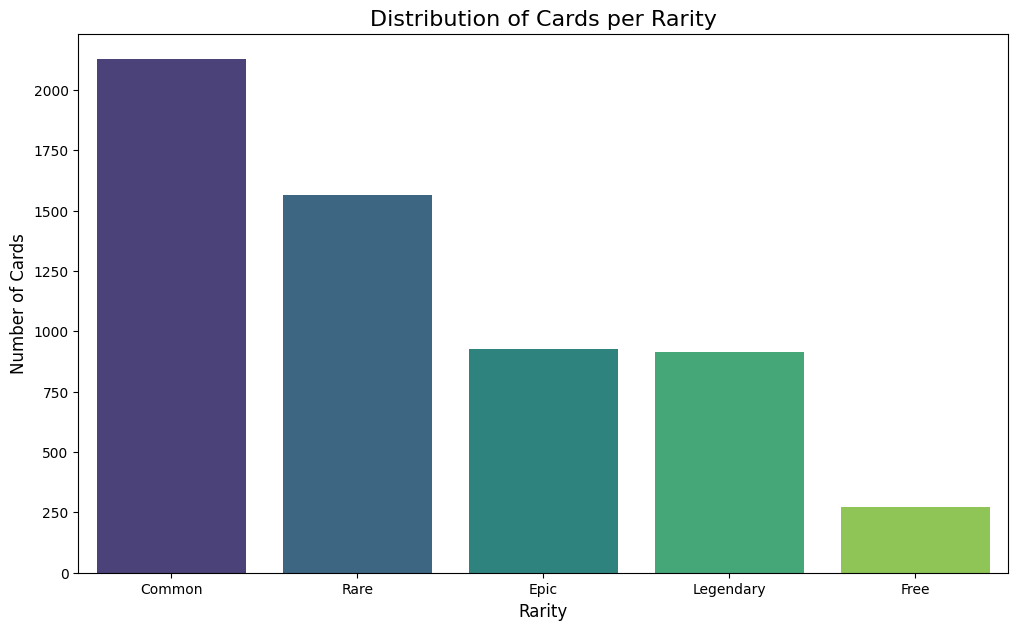

In [213]:
rarities = df['rarityId'].value_counts()

plt.figure(figsize=(12, 7))
sns.barplot(x=rarities.index, y=rarities.values, hue=rarities.index, palette='viridis', legend=False)

plt.title('Distribution of Cards per Rarity', fontsize=16)
plt.xlabel('Rarity', fontsize=12)
plt.ylabel('Number of Cards', fontsize=12)

plt.show()

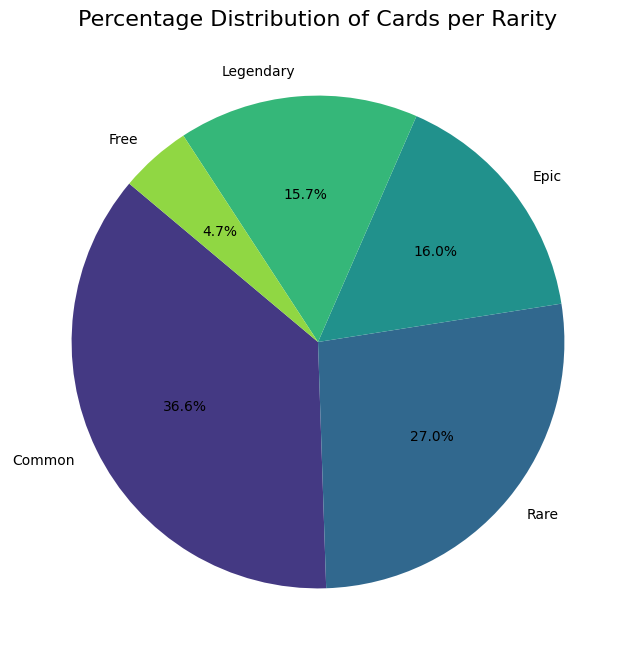

In [214]:
plt.figure(figsize=(8, 8))
plt.pie(rarities.values, labels=rarities.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(rarities)))
plt.title('Percentage Distribution of Cards per Rarity', fontsize=16)

# Show the pie chart
plt.show()

### **Conclusion: Hearthstone Card Rarity Distribution**

The distribution of card rarities in **Hearthstone** is designed to balance accessibility and strategy for players of all levels.

- **Free Cards (272)**: These cards are primarily for new players, offering basic, essential cards to help build their first decks.
  
- **Common Cards (2127)**: The most abundant rarity, **Common** cards provide a wide range of options for deck-building, ensuring players have plenty of foundational cards for any strategy.

- **Rare Cards (1565)**: **Rare** cards are less frequent than **Common** but offer more powerful effects, helping to shape mid-game strategies.

- **Epic Cards (927)**: **Epic** cards are rarer, offering high-impact abilities. Their limited number adds excitement and strategic depth.

- **Legendary Cards (914)**: The rarest cards, **Legendary** cards feature unique, game-changing effects, making them valuable assets for advanced strategies.

Overall, the rarity distribution ensures that **Hearthstone** offers accessible deck-building options while rewarding players with powerful cards at higher rarities to deepen the gameplay experience.